# IOD DATA SCIENCE MINI PROJECT 1 (Niaz Shamsudeen)

## About the Project
#### Identify Synthetic Datasets using data analysis and Tranforming the dataset for further analysis

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

#### 1. Reading file, Exploring and doing Basic cleaning by removing nulls

In [151]:
online_sales_df = pd.read_csv('online_sales_dataset.csv')

In [152]:
# Total 49,782 rows
# Customer ID, non null rows are 44,804
# Shipping Cost and Ware House locations also has null values, but less null values compared to customer id
#
# So, removing all rows with CustomerID equal to null
# As there are nearly 50K records, removing few K records still leave a lot of rows
# It is also assumed that other null field rows are a subset of rows with Customer Id as null and a single deletion of rows
#   based on CustomerID as null will remove all the null values from dataset

online_sales_df_nonnull = online_sales_df.dropna(subset=['CustomerID'],axis=0)
online_sales_df_nonnull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44804 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          44804 non-null  int64  
 1   StockCode          44804 non-null  object 
 2   Description        44804 non-null  object 
 3   Quantity           44804 non-null  int64  
 4   InvoiceDate        44804 non-null  object 
 5   UnitPrice          44804 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            44804 non-null  object 
 8   Discount           44804 non-null  float64
 9   PaymentMethod      44804 non-null  object 
 10  ShippingCost       44804 non-null  float64
 11  Category           44804 non-null  object 
 12  SalesChannel       44804 non-null  object 
 13  ReturnStatus       44804 non-null  object 
 14  ShipmentProvider   44804 non-null  object 
 15  WarehouseLocation  44804 non-null  object 
 16  OrderPriority      44804 no

In [153]:
# Checking what the format of the date and whether months and day values make sense by summarising
print("ARE THE MONTHS BETWEEN 01 AND 12")
print(online_sales_df_nonnull['InvoiceDate'].str[5:7].value_counts().sort_index())
print("\n")
print("ARE THE DAYA BETWEEN 01 AND 31")
print(online_sales_df_nonnull['InvoiceDate'].str[8:10].value_counts().sort_index())

ARE THE MONTHS BETWEEN 01 AND 12
InvoiceDate
01    4020
02    3663
03    4042
04    3917
05    4007
06    3889
07    4000
08    4001
09    3315
10    3345
11    3231
12    3374
Name: count, dtype: int64


ARE THE DAYA BETWEEN 01 AND 31
InvoiceDate
01    1494
02    1510
03    1498
04    1497
05    1477
06    1452
07    1462
08    1465
09    1449
10    1485
11    1465
12    1480
13    1492
14    1488
15    1478
16    1459
17    1453
18    1457
19    1491
20    1457
21    1457
22    1465
23    1462
24    1461
25    1490
26    1446
27    1461
28    1474
29    1355
30    1350
31     874
Name: count, dtype: int64


In [154]:
# Changing the InvoiceDate from Object to Date
online_sales_df_nonnull['InvoiceDate'] = pd.to_datetime(online_sales_df_nonnull['InvoiceDate'])

C:\Users\niazs\AppData\Local\Temp\ipykernel_24496\122078020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_sales_df_nonnull['InvoiceDate'] = pd.to_datetime(online_sales_df_nonnull['InvoiceDate'])


In [155]:
# Checking the date range
online_sales_df_nonnull['InvoiceDate']

0       2020-01-01 00:00:00
1       2020-01-01 01:00:00
2       2020-01-01 02:00:00
3       2020-01-01 03:00:00
5       2020-01-01 05:00:00
                ...        
49777   2025-09-05 01:00:00
49778   2025-09-05 02:00:00
49779   2025-09-05 03:00:00
49780   2025-09-05 04:00:00
49781   2025-09-05 05:00:00
Name: InvoiceDate, Length: 44804, dtype: datetime64[ns]

#### 2. Adding new column for summarising observations

In [157]:
# Adding a new column with Year and month values from Invoice date for later summarisation and 
#   visualisation

YYYYMM = online_sales_df_nonnull['InvoiceDate'].dt.year * 100 + online_sales_df_nonnull['InvoiceDate'].dt.month
online_sales_df_nonnull['InDtYYYYMM'] = YYYYMM

C:\Users\niazs\AppData\Local\Temp\ipykernel_24496\148298221.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_sales_df_nonnull['InDtYYYYMM'] = YYYYMM


In [158]:
online_sales_df_nonnull['InDtYYYYMM'].unique

<bound method Series.unique of 0        202001
1        202001
2        202001
3        202001
5        202001
          ...  
49777    202509
49778    202509
49779    202509
49780    202509
49781    202509
Name: InDtYYYYMM, Length: 44804, dtype: int32>

#### 3. Exploring whether the dataset is synthetic

In [160]:
pd.DataFrame(
    online_sales_df_nonnull[['Country','Description','PaymentMethod','ShipmentProvider']]
    .melt(var_name='column', value_name='value')
    .value_counts())

count
column           value                
PaymentMethod    Bank Transfer   15086
                 Credit Card     14907
                 paypall         14811
ShipmentProvider FedEx           11296
                 Royal Mail      11196
                 UPS             11158
                 DHL             11154
Description      Wall Clock       4159
                 USB Cable        4130
                 Backpack         4122
                 Desk Lamp        4103
                 White Mug        4091
                 Office Chair     4065
                 Headphones       4058
                 T-shirt          4050
                 Blue Pen         4036
                 Notebook         4015
                 Wireless Mouse   3975
Country          France           3820
                 Sweden           3771
                 Germany          3763
                 Netherlands      3753
                 Portugal         3747
                 Belgium          3745
                 Norway           3740
                 United Kingdom   3735
                 Spain            3700
                 Australia        3698
                 United States    3690
                 Italy            3642

In [161]:
# Dropping all the records with Invoice date in years 2024 and 2024

online_sales_df_nonnull_nonsyn = online_sales_df_nonnull.drop(online_sales_df_nonnull[online_sales_df_nonnull.InDtYYYYMM 
                                                              > 202312].index)


In [162]:
def calc_inv_amount(df):
# Adding / updating a new column called Invoice Amount = Quantity * unit price * 1- discount + Shipping Cost  

    InvAmount = ( ( df['Quantity'] * df['UnitPrice'] ) *
              ( 1 - df['Discount'])
            ) + df['ShippingCost']

    df['InvAmount'] = InvAmount
    return df

In [163]:
online_sales_df_nonnull_nonsyn = calc_inv_amount(online_sales_df_nonnull_nonsyn)

In [164]:
summ_cols = ['Country','Description','PaymentMethod','ShipmentProvider']
InvAmount_sum_df = pd.DataFrame()

for cols in summ_cols:
    InvAmount_sum = online_sales_df_nonnull_nonsyn.groupby([cols])['InvAmount'].sum().reset_index()
    InvAmount_sum['InvAmount'] = (InvAmount_sum['InvAmount']).round(2)
    InvAmount_sum_df  = pd.concat([InvAmount_sum_df, InvAmount_sum], axis=1, ignore_index=True)

InvAmount_sum_df = InvAmount_sum_df.fillna(' ')
InvAmount_sum_df.columns = ['Country', 'Ctry-TOT', 'Description', 'Desc-TOT','PaymentMethod', 'PayMtd-TOT','ShipmentProvider', 'ShpPr-TOT']
InvAmount_sum_df = InvAmount_sum_df.map(lambda x: '{:,.2f}'.format(x) if isinstance(x, (int, float)) else x)

InvAmount_sum_df

,Country,Ctry-TOT,Description,Desc-TOT,PaymentMethod,PayMtd-TOT,ShipmentProvider,ShpPr-TOT
0,Australia,"2,515,731.13",Backpack,"2,775,912.92",Bank Transfer,"10,287,850.63",DHL,"7,514,256.41"
1,Belgium,"2,573,550.58",Blue Pen,"2,728,069.61",Credit Card,"10,125,758.39",FedEx,"7,696,663.40"
2,France,"2,593,933.13",Desk Lamp,"2,742,196.35",paypall,"9,834,978.52",Royal Mail,"7,562,823.03"
3,Germany,"2,551,560.34",Headphones,"2,751,989.02",,,UPS,"7,474,844.71"
4,Italy,"2,442,877.77",Notebook,"2,687,792.43",,,,
5,Netherlands,"2,488,949.96",Office Chair,"2,763,280.93",,,,
6,Norway,"2,475,136.85",T-shirt,"2,692,646.45",,,,
7,Portugal,"2,480,728.91",USB Cable,"2,806,970.44",,,,
8,Spain,"2,430,906.50",Wall Clock,"2,743,701.65",,,,
9,Sweden,"2,533,522.75",White Mug,"2,874,826.52",,,,


In [165]:
online_sales_df_nonnull_nonsyn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31588 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   InvoiceNo          31588 non-null  int64         
 1   StockCode          31588 non-null  object        
 2   Description        31588 non-null  object        
 3   Quantity           31588 non-null  int64         
 4   InvoiceDate        31588 non-null  datetime64[ns]
 5   UnitPrice          31588 non-null  float64       
 6   CustomerID         31588 non-null  float64       
 7   Country            31588 non-null  object        
 8   Discount           31588 non-null  float64       
 9   PaymentMethod      31588 non-null  object        
 10  ShippingCost       31588 non-null  float64       
 11  Category           31588 non-null  object        
 12  SalesChannel       31588 non-null  object        
 13  ReturnStatus       31588 non-null  object        
 14  ShipmentPro

In [166]:
def prepare_d_for_chart(sales_21_to_24):

    # This will split the data by year
    
    # Splitting sales data by Year
    global sales_2020
    global sales_2021
    global sales_2022
    global sales_2023
    #sales_2020 = online_sales_df_nonnull_nonsyn[online_sales_df_nonnull_nonsyn['InvoiceDate'].dt.year == 2020]
    sales_2020 = sales_21_to_24[sales_21_to_24['InvoiceDate'].dt.year == 2020]
    sales_2021 = sales_21_to_24[sales_21_to_24['InvoiceDate'].dt.year == 2021]
    sales_2022 = sales_21_to_24[sales_21_to_24['InvoiceDate'].dt.year == 2022]
    sales_2023 = sales_21_to_24[sales_21_to_24['InvoiceDate'].dt.year == 2023]

    # Summary data for line chart
    global sales_2020_summ_IA
    global sales_2021_summ_IA
    global sales_2022_summ_IA
    global sales_2023_summ_IA
    sales_2020_summ_IA = sales_2020.groupby('InDtYYYYMM')['InvAmount'].sum()
    sales_2021_summ_IA = sales_2021.groupby('InDtYYYYMM')['InvAmount'].sum()
    sales_2022_summ_IA = sales_2022.groupby('InDtYYYYMM')['InvAmount'].sum()
    sales_2023_summ_IA = sales_2023.groupby('InDtYYYYMM')['InvAmount'].sum()

    # Summary data for Pie Chart
    global sales_2020_summ_CT
    global sales_2021_summ_CT
    global sales_2022_summ_CT
    global sales_2023_summ_CT
    sales_2020_summ_CT = sales_2020.groupby('Category')['InvAmount'].sum()/1000
    sales_2021_summ_CT = sales_2021.groupby('Category')['InvAmount'].sum()/1000
    sales_2022_summ_CT = sales_2022.groupby('Category')['InvAmount'].sum()/1000
    sales_2023_summ_CT = sales_2023.groupby('Category')['InvAmount'].sum()/1000


In [167]:
def sales_line_chart(ylim=(0, 700000),flg='N'):
    # Month labels
    month_labels = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']
    
    # Sales data for each year (assuming these are pandas Series or similar)
    sales_data = {
        '2020': sales_2020_summ_IA,
        '2021': sales_2021_summ_IA,
        '2022': sales_2022_summ_IA,
        '2023': sales_2023_summ_IA
    }

    colors = ['blue', 'green', 'red', 'purple']

    plt.figure(figsize=(8, 7))

    for i, (year, data) in enumerate(sales_data.items()):
        plt.subplot(2, 2, i + 1)  # Create subplot at position (2, 2, i+1)
        plt.plot(data.index, data.values, color=colors[i])  # Plot the data for the year
        plt.xticks(data.index, month_labels)  # Set month labels
        plt.xlabel(f"{year} Sales", color=colors[i])  # Set label for the x-axis
        plt.grid(True)
        if flg == 'Y':
            plt.ylim(ylim)
        #plt.ylim(0, 700000)

    # Adjust layout and spacing
    plt.subplots_adjust(hspace=0.4)
    plt.tight_layout()

    # Show the plot
    plt.show()
    

In [168]:
def sales_pie_chart(explode):

    sales_data = {
        '2020': sales_2020_summ_CT,
        '2021': sales_2021_summ_CT,
        '2022': sales_2022_summ_CT,
        '2023': sales_2023_summ_CT
    }

    colors = ['blue', 'green', 'red', 'purple']

    plt.figure(figsize=(8, 7))
    

    for i, (year, data) in enumerate(sales_data.items()):
        plt.subplot(2, 2, i + 1)  # Create subplot at position (2, 2, i+1)
        plt.pie(data.values,labels=data.index,autopct=lambda p: f'{p * sum(data.values) / 100:.0f} K$', explode =explode)
        plt.xlabel(f"{year} Sales", color=colors[i])  # Set label for the x-axis
    

In [169]:
prepare_d_for_chart(online_sales_df_nonnull_nonsyn)


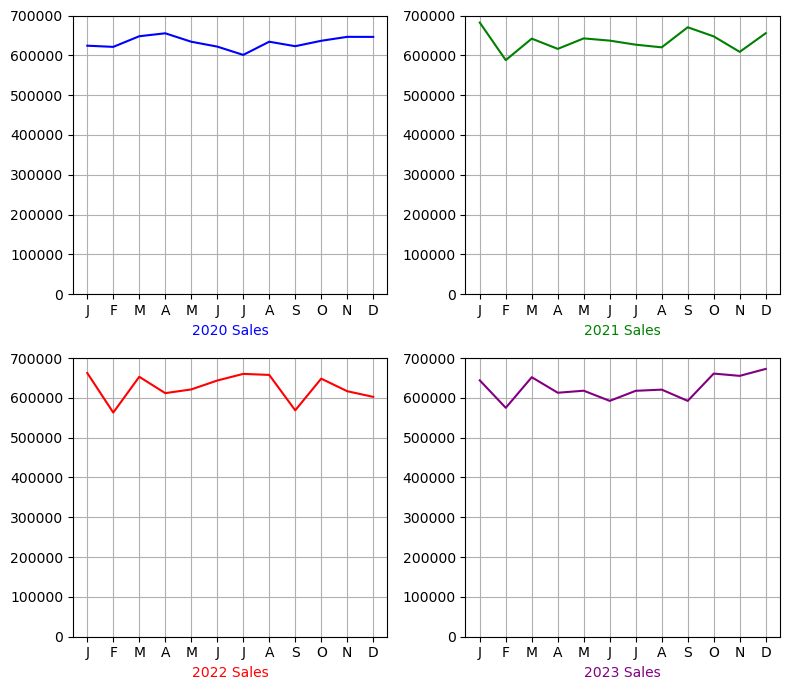

In [170]:
sales_line_chart((0, 700000),'Y')

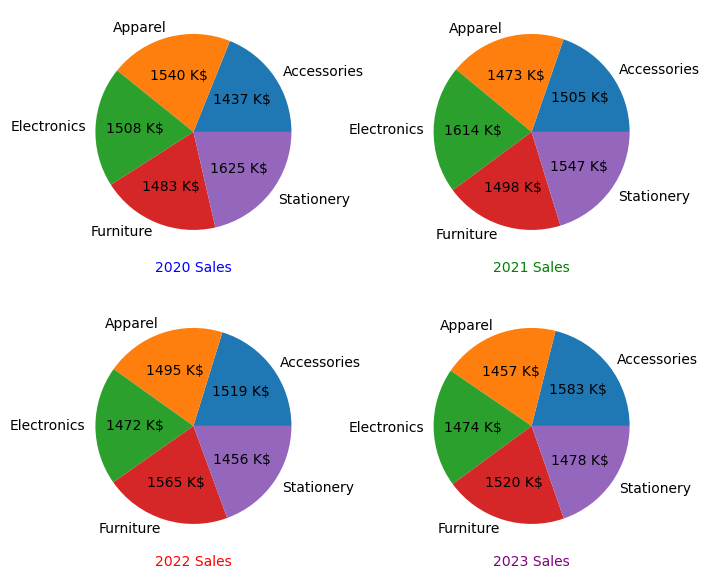

In [171]:
sales_pie_chart([0,0,0,0,0])

In [172]:
InvAmount_describe = pd.DataFrame()
InvAmount_describe  = pd.concat([InvAmount_describe, sales_2020_summ_IA.describe()], axis=1, ignore_index=True)
InvAmount_describe  = pd.concat([InvAmount_describe, sales_2021_summ_IA.describe()], axis=1, ignore_index=True)
InvAmount_describe  = pd.concat([InvAmount_describe, sales_2022_summ_IA.describe()], axis=1, ignore_index=True)
InvAmount_describe  = pd.concat([InvAmount_describe, sales_2023_summ_IA.describe()], axis=1, ignore_index=True)
InvAmount_describe.columns = ['Y - 2020', ' Y - 2021' ,'Y - 2022', 'Y - 2023']
InvAmount_describe = InvAmount_describe.map(lambda x: '{:,.2f}'.format(x) if isinstance(x, (int, float)) else x)
InvAmount_describe

,Y - 2020,Y - 2021,Y - 2022,Y - 2023
count,12.00,12.00,12.00,12.00
mean,"632,655.83","636,378.86","625,633.78","626,047.16"
std,"15,229.65","26,458.12","34,547.53","30,805.87"
min,"601,044.54","587,955.01","562,977.34","574,899.44"
25%,"622,642.34","619,070.27","609,398.80","607,641.95"
50%,"634,158.05","639,416.67","632,234.07","619,199.88"
75%,"646,292.13","649,523.34","653,985.63","652,613.42"
max,"655,304.19","682,203.79","662,304.57","672,575.61"


##   Creating Modifiled dataset 1 (written to the file 'sales_non_sys_01.csv' ) and Visualising
###  Showing limited variation and variety
###  Both Quantity and Unit price are scaled by random numbers

In [174]:
# Make random changes to Quantity
random_scaler = [random.uniform(0.1, 5) for _ in range(len(online_sales_df_nonnull_nonsyn))]
new_quantity = online_sales_df_nonnull_nonsyn['Quantity'] * random_scaler

# Make random changes to Unit Price
new_unitprice = online_sales_df_nonnull_nonsyn['UnitPrice'] * random_scaler

modified_df_1 = online_sales_df_nonnull_nonsyn.copy()
modified_df_1['Quantity'] = new_quantity
modified_df_1['UnitPrice'] = new_unitprice

modified_df_1 = calc_inv_amount(modified_df_1)

In [175]:
prepare_d_for_chart(modified_df_1)


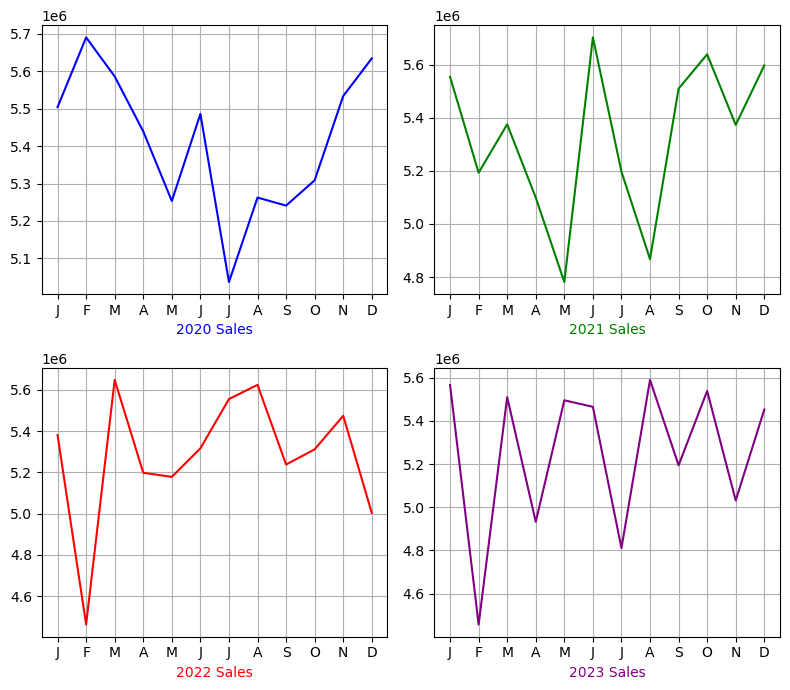

In [176]:
sales_line_chart()


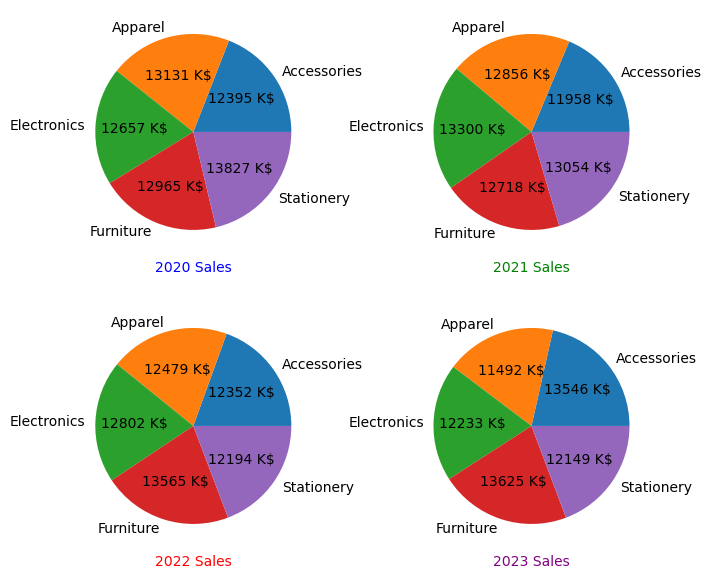

In [177]:
sales_pie_chart([0,0,0,0,0])

In [178]:
InvAmount_describe = pd.DataFrame()
InvAmount_describe  = pd.concat([InvAmount_describe, sales_2020_summ_IA.describe()], axis=1, ignore_index=True)
InvAmount_describe  = pd.concat([InvAmount_describe, sales_2021_summ_IA.describe()], axis=1, ignore_index=True)
InvAmount_describe  = pd.concat([InvAmount_describe, sales_2022_summ_IA.describe()], axis=1, ignore_index=True)
InvAmount_describe  = pd.concat([InvAmount_describe, sales_2023_summ_IA.describe()], axis=1, ignore_index=True)
InvAmount_describe.columns = ['Y - 2020', ' Y - 2021' ,'Y - 2022', 'Y - 2023']
InvAmount_describe = InvAmount_describe.map(lambda x: '{:,.2f}'.format(x) if isinstance(x, (int, float)) else x)
InvAmount_describe


,Y - 2020,Y - 2021,Y - 2022,Y - 2023
count,12.00,12.00,12.00,12.00
mean,"5,414,656.41","5,323,852.08","5,282,711.23","5,253,811.15"
std,"194,167.63","300,925.28","322,235.10","367,889.85"
min,"5,036,918.96","4,781,248.43","4,463,202.75","4,456,766.61"
25%,"5,260,158.94","5,169,381.41","5,193,240.45","5,006,651.05"
50%,"5,462,609.25","5,373,894.35","5,314,156.91","5,459,071.21"
75%,"5,546,782.99","5,564,702.37","5,494,588.56","5,517,515.13"
max,"5,690,383.90","5,702,482.07","5,648,151.64","5,590,187.40"


##   Created Modifiled dataset 2 (written to the file 'sales_non_sys_02.csv' ) and Visualising
###  Showing better variation and variety
###  Quantity is scaled by random numbers, but Unit Price of selected items are scaled systematically

In [180]:
# Make random changes to Quantity
#random_scaler = [random.uniform(0.1, 5) for _ in range(len(online_sales_df_nonnull_nonsyn))]
new_quantity = online_sales_df_nonnull_nonsyn['Quantity'] * random_scaler


# Make Apparel and Stationery standout in Pie Chart
CAT_up = online_sales_df_nonnull_nonsyn[['Category','UnitPrice']]
CAT_up.loc[CAT_up['Category'] == "Apparel", 'UnitPrice'] *= 3
CAT_up.loc[CAT_up['Category'] == "Stationery", 'UnitPrice'] *= 0.2

modified_df_2 = online_sales_df_nonnull_nonsyn.copy()
modified_df_2['Quantity'] = new_quantity
modified_df_2['UnitPrice'] = CAT_up['UnitPrice']

modified_df_2 = calc_inv_amount(modified_df_2)

In [181]:
prepare_d_for_chart(modified_df_2)

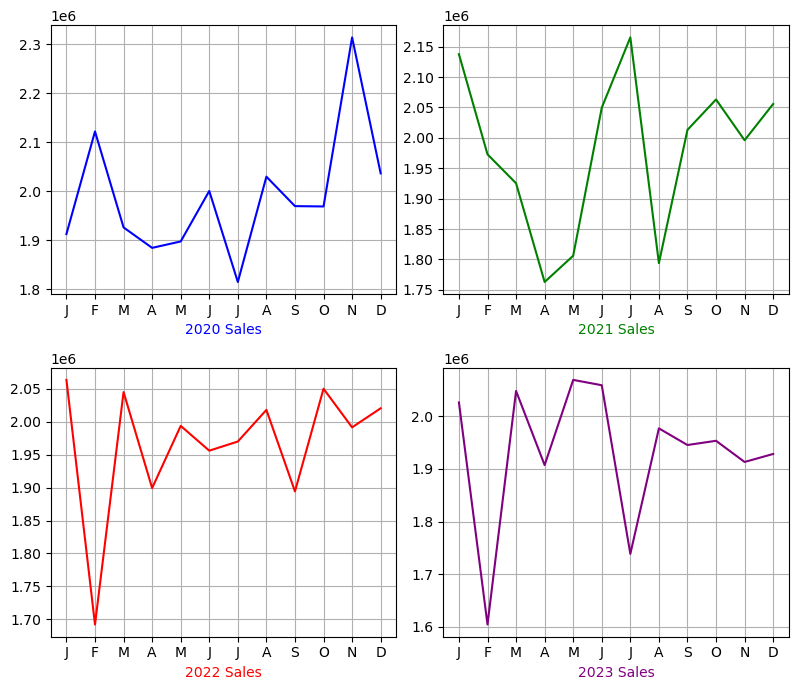

In [182]:
sales_line_chart()

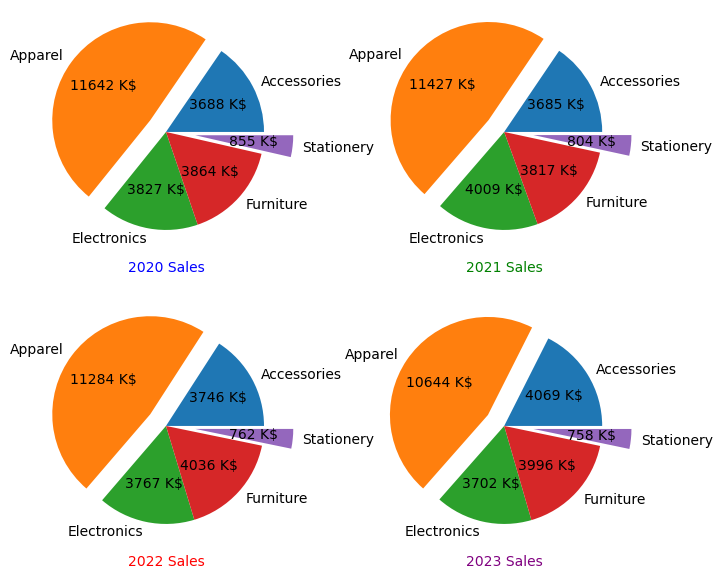

In [183]:
sales_pie_chart([0,0.2,0,0,0.3])

In [184]:
InvAmount_describe = pd.DataFrame()
InvAmount_describe  = pd.concat([InvAmount_describe, sales_2020_summ_IA.describe()], axis=1, ignore_index=True)
InvAmount_describe  = pd.concat([InvAmount_describe, sales_2021_summ_IA.describe()], axis=1, ignore_index=True)
InvAmount_describe  = pd.concat([InvAmount_describe, sales_2022_summ_IA.describe()], axis=1, ignore_index=True)
InvAmount_describe  = pd.concat([InvAmount_describe, sales_2023_summ_IA.describe()], axis=1, ignore_index=True)
InvAmount_describe.columns = ['Y - 2020', ' Y - 2021' ,'Y - 2022', 'Y - 2023']
InvAmount_describe = InvAmount_describe.map(lambda x: '{:,.2f}'.format(x) if isinstance(x, (int, float)) else x)
InvAmount_describe

,Y - 2020,Y - 2021,Y - 2022,Y - 2023
count,12.00,12.00,12.00,12.00
mean,"1,989,662.71","1,978,497.45","1,966,310.65","1,930,816.21"
std,"130,545.38","132,438.17","102,230.98","136,583.88"
min,"1,814,758.77","1,762,985.51","1,691,892.92","1,604,757.19"
25%,"1,908,799.53","1,895,521.84","1,941,980.72","1,911,695.78"
50%,"1,969,208.93","2,004,624.68","1,992,790.01","1,949,363.39"
75%,"2,031,327.74","2,057,592.36","2,026,805.63","2,031,619.08"
max,"2,313,811.82","2,165,217.38","2,063,824.09","2,068,932.94"


##   Creating Modifiled dataset 3 (written to the file 'sales_non_sys_03.csv' ) and Visualising
###  Showing limited variation
###  Quantity is scaled by 'Purchasing Managers Index' showing expansion or contraction based on a scale of 50
#### Although related to manufacturing industry, it is assumed that manufacturing itself is mainly driven by demand from end customers

In [186]:
# PMI data from website - https://www.investing.com/economic-calendar/manufacturing-pmi-829
pmi_usa = pd.read_csv('pmi_usa.csv')

#Formatting data text field to obtain Year and Month
pmi_usa['Year'] = pmi_usa['Release Date'].astype(str).str[8:13]
pmi_usa['Mth'] = pmi_usa['Release Date'].str.extract(r'(\w{3})\s*\d{1,2},\s*\d{4}\s*\((\w{3})\)')[1]

#Creating a new column with format YYYYMM to match with sales dataset for scaling
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
pmi_usa['Mth'] = pmi_usa['Mth'].map(month_map)
pmi_usa['Year'] = pd.to_numeric(pmi_usa['Year'], errors='coerce').fillna(0).astype(int)
pmi_usa['YYYYMM'] = pmi_usa['Year'] * 100 + pmi_usa['Mth']

#Calculating a scalar to be multiplied with Quantity based on maximum value in the column Previous and create a 
#  column named pmi with new data
max_actual_by_YYYYMM = pmi_usa.groupby('YYYYMM')['Previous'].transform('max')
pmi_usa['pmi'] = max_actual_by_YYYYMM

#Create a subset of above dataframe with only relevant columns
pmi_usa_trimmed = pmi_usa[['YYYYMM','pmi']]

#Remove all duplicate rows
pmi_usa_unique = pmi_usa_trimmed.drop_duplicates()

#Remove data belong to 2024
pmi_usa_4years = pmi_usa_unique.drop(pmi_usa_unique[pmi_usa_unique.YYYYMM > 202312].index)

#Creating a scalar - > 1 if expansion, < 1 if contraction
pmi_usa_4years['scalar'] =  ( pmi_usa_4years['pmi']  *  2 ) /100

In [187]:
# Scaling the sales dataframe

modified_df_3 = online_sales_df_nonnull_nonsyn.copy()

# Merge the two DataFrames on the 'InDtYYYYMM' and 'YYYYMM' columns
merged_df = pd.merge(modified_df_3, pmi_usa_4years, left_on='InDtYYYYMM', right_on='YYYYMM', how='inner')

# Perform the multiplication
new_qauntity = merged_df['Quantity'] * merged_df['scalar']
modified_df_3['Quantity'] = new_quantity

modified_df_3 = calc_inv_amount(modified_df_3)


In [188]:
prepare_d_for_chart(modified_df_3)

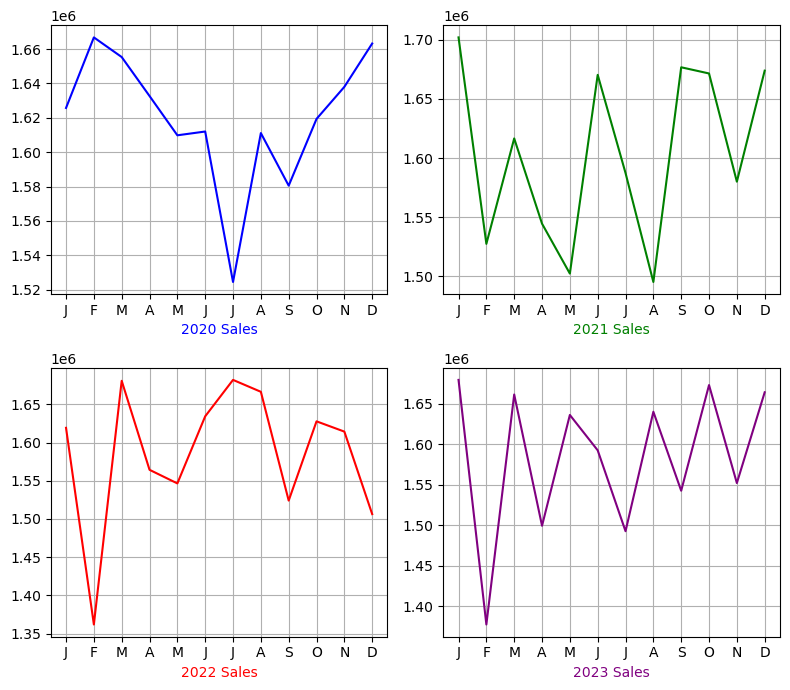

In [189]:
sales_line_chart()

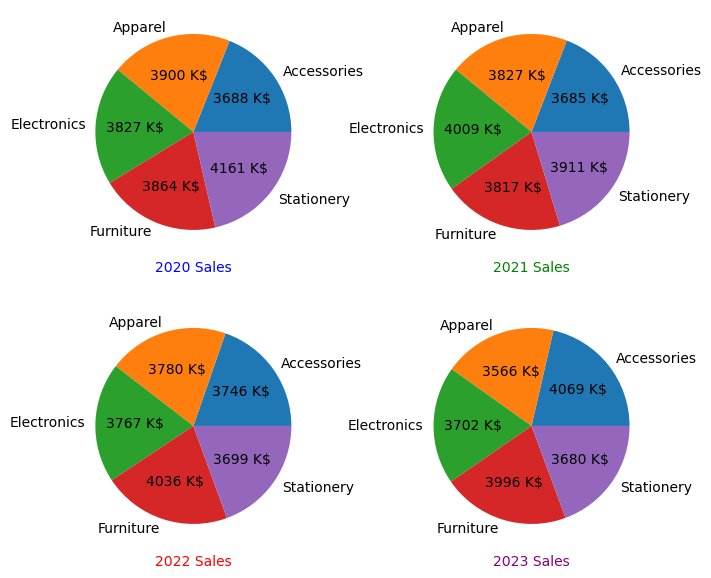

In [190]:
sales_pie_chart([0,0,0,0,0])

In [191]:
InvAmount_describe = pd.DataFrame()
InvAmount_describe  = pd.concat([InvAmount_describe, sales_2020_summ_IA.describe()], axis=1, ignore_index=True)
InvAmount_describe  = pd.concat([InvAmount_describe, sales_2021_summ_IA.describe()], axis=1, ignore_index=True)
InvAmount_describe  = pd.concat([InvAmount_describe, sales_2022_summ_IA.describe()], axis=1, ignore_index=True)
InvAmount_describe  = pd.concat([InvAmount_describe, sales_2023_summ_IA.describe()], axis=1, ignore_index=True)
InvAmount_describe.columns = ['Y - 2020', ' Y - 2021' ,'Y - 2022', 'Y - 2023']
InvAmount_describe = InvAmount_describe.map(lambda x: '{:,.2f}'.format(x) if isinstance(x, (int, float)) else x)
InvAmount_describe

,Y - 2020,Y - 2021,Y - 2022,Y - 2023
count,12.00,12.00,12.00,12.00
mean,"1,619,949.23","1,604,057.78","1,585,678.19","1,584,455.31"
std,"39,058.09","74,659.98","92,019.53","93,511.23"
min,"1,524,425.47","1,495,279.45","1,361,842.07","1,377,787.88"
25%,"1,610,810.11","1,540,322.64","1,540,902.73","1,532,039.95"
50%,"1,622,567.08","1,602,021.36","1,616,812.99","1,614,521.99"
75%,"1,642,387.77","1,672,163.70","1,642,379.58","1,662,251.17"
max,"1,666,844.17","1,702,063.86","1,682,023.61","1,679,604.18"


# Storing dataframes to csv files

In [193]:
# Quantity and Unit prices scaled by random scalars
modified_df_1.to_csv('sales_non_sys_01.csv', index=False)

# Quantity scaled randomly, but Unit prices changed systematically
modified_df_2.to_csv('sales_non_sys_02.csv', index=False)

# Quantity scaled based on industry statistical data
modified_df_3.to_csv('sales_non_sys_03.csv', index=False)

##   Reading one of the newly created dataset ie 'sales_non_sys_02.csv' for further visualisation

In [195]:
online_sales_df = pd.read_csv('sales_non_sys_02.csv')

In [196]:
online_sales_df['Year'] = online_sales_df['InDtYYYYMM'].astype(str).str[:4]

In [197]:
online_sales_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,InDtYYYYMM,InvAmount,Year
0,221958,SKU_1964,White Mug,25.565702,2020-01-01 00:00:00,5.130,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium,202001,80.300587,2020
1,771155,SKU_1241,White Mug,55.736761,2020-01-01 01:00:00,41.250,19144.0,Spain,0.19,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium,202001,1871.814533,2020
2,231932,SKU_1501,Headphones,47.062288,2020-01-01 02:00:00,29.110,50472.0,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High,202001,913.519092,2020
3,465838,SKU_1760,Desk Lamp,13.481024,2020-01-01 03:00:00,76.680,96586.0,Netherlands,0.14,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low,202001,900.083454,2020
4,744167,SKU_1006,Office Chair,99.340947,2020-01-01 05:00:00,70.160,53887.0,Sweden,0.48,Credit Card,13.98,Electronics,Online,Not Returned,DHL,London,Medium,202001,3638.255624,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31583,777548,SKU_1210,Headphones,0.865885,2023-12-31 19:00:00,277.920,36062.0,Australia,0.14,paypall,8.33,Apparel,In-store,Not Returned,Royal Mail,Amsterdam,High,202312,215.286230,2023
31584,166019,SKU_1797,Office Chair,53.743866,2023-12-31 20:00:00,36.190,99978.0,Norway,0.43,paypall,10.82,Electronics,Online,Returned,DHL,Paris,High,202312,1119.464594,2023
31585,624739,SKU_1835,Wireless Mouse,31.651638,2023-12-31 21:00:00,49.160,83182.0,Norway,0.12,paypall,17.09,Accessories,In-store,Not Returned,FedEx,Amsterdam,High,202312,1386.365189,2023
31586,950706,SKU_1326,Office Chair,15.311169,2023-12-31 22:00:00,8.462,28358.0,Norway,0.22,Bank Transfer,15.50,Stationery,In-store,Returned,DHL,Amsterdam,Low,202312,116.559225,2023


C:\Users\niazs\AppData\Local\Temp\ipykernel_24496\2045286508.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabel, rotation=90, ha='right')


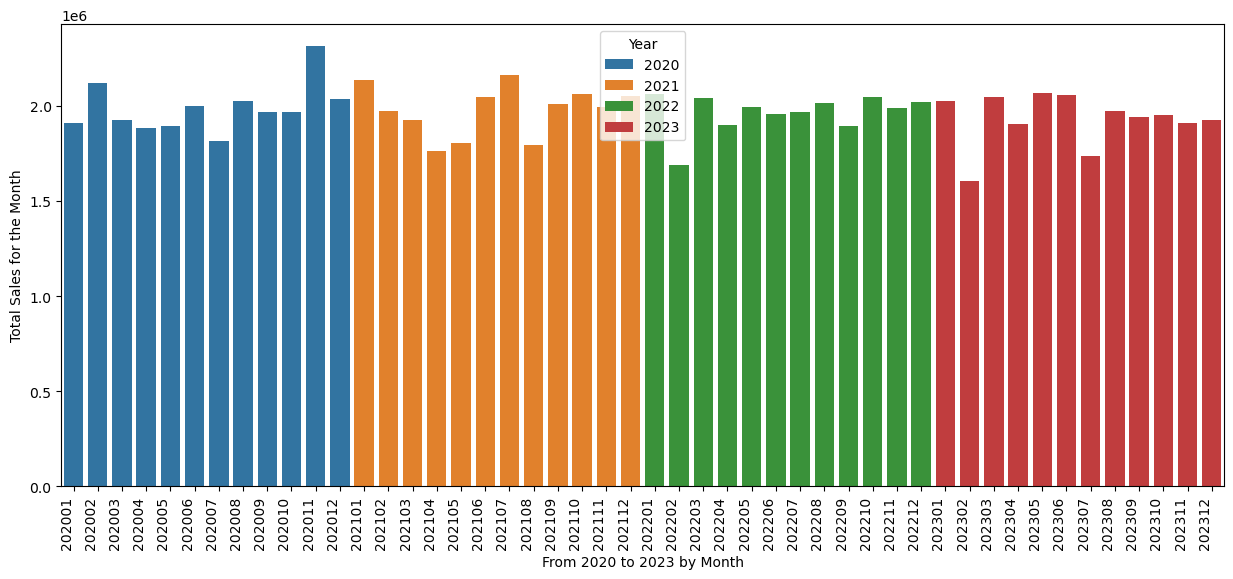

In [198]:
summary_sales_df = online_sales_df.groupby('InDtYYYYMM')['InvAmount'].sum().reset_index()
summary_sales_df['Year'] = summary_sales_df['InDtYYYYMM'].astype(str).str[:4]
xticklabel = ['202001','202002','202003','202004','202005','202006','202007','202008','202009','202010','202011','202012',
              '202101','202102','202103','202104','202105','202106','202107','202108','202109','202110','202111','202112',
              '202201','202202','202203','202204','202205','202206','202207','202208','202209','202210','202211','202212',
              '202301','202302','202303','202304','202305','202306','202307','202308','202309','202310','202311','202312']
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='InDtYYYYMM', y='InvAmount', data=summary_sales_df, hue='Year')
ax.set_xticklabels(xticklabel, rotation=90, ha='right')
plt.xlabel("From 2020 to 2023 by Month")
plt.ylabel("Total Sales for the Month")
plt.show()

C:\Users\niazs\AppData\Local\Temp\ipykernel_24496\4272629322.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabel, rotation=90, ha='right')


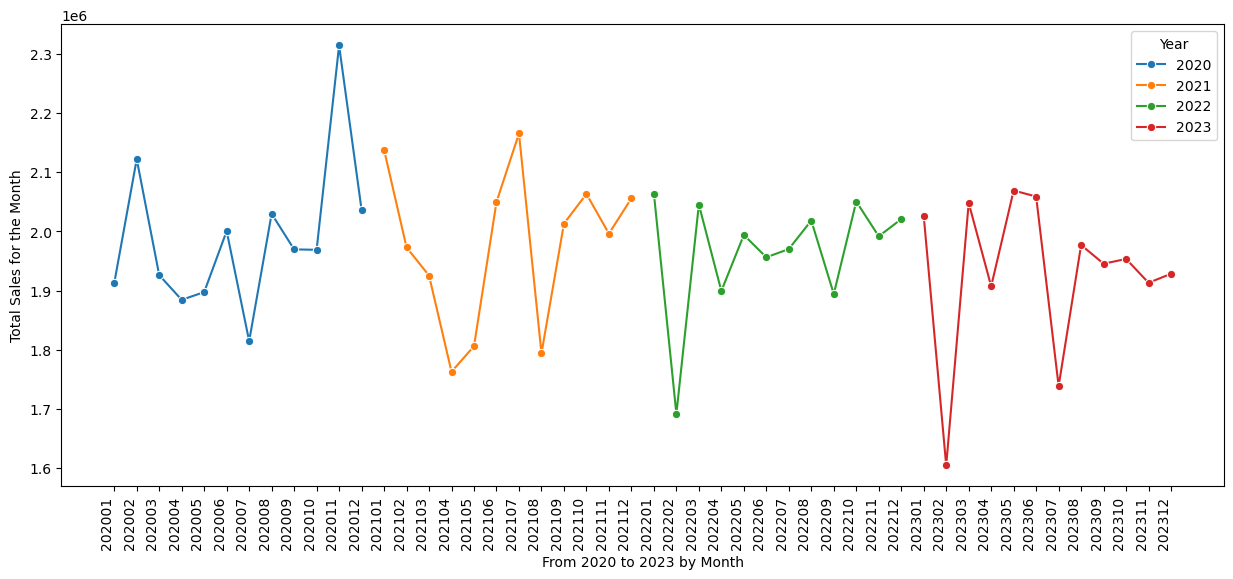

In [199]:
# Step 1: Summarize data by InDtYYYYMM
summary_sales_df = online_sales_df.groupby('InDtYYYYMM')['InvAmount'].sum().reset_index()

# Step 2: Extract the year from the InDtYYYYMM column
summary_sales_df['Year'] = summary_sales_df['InDtYYYYMM'].astype(str).str[:4]

# Step 3: Create a line plot using Seaborn
plt.figure(figsize=(15, 6))
summary_sales_df['InDtYYYYMM'] = summary_sales_df['InDtYYYYMM'].astype(str)
# Use sns.lineplot instead of sns.barplot for a line plot
ax = sns.lineplot(x='InDtYYYYMM', y='InvAmount', data=summary_sales_df, hue='Year', marker='o')

xticklabel = ['202001','202002','202003','202004','202005','202006','202007','202008','202009','202010','202011','202012',
              '202101','202102','202103','202104','202105','202106','202107','202108','202109','202110','202111','202112',
              '202201','202202','202203','202204','202205','202206','202207','202208','202209','202210','202211','202212',
              '202301','202302','202303','202304','202305','202306','202307','202308','202309','202310','202311','202312']

# Set the xtick labels to the custom labels and rotate them for better readability
ax.set_xticklabels(xticklabel, rotation=90, ha='right')
plt.xlabel("From 2020 to 2023 by Month")
plt.ylabel("Total Sales for the Month")
plt.show()

In [200]:
sales_2020_summ_IA.values

array([1625755.80048248, 1666844.16742723, 1655404.814456  ,
       1632718.58870709, 1609838.1012828 , 1612037.60855843,
       1524425.47434785, 1611134.11057146, 1580520.11490892,
       1619378.36691745, 1638048.76183198, 1663284.830591  ])

In [201]:
online_sales_df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Discount,ShippingCost,InDtYYYYMM,InvAmount
count,31588.000000,31588.000000,31588.000000,31588.000000,31588.000000,31588.000000,31588.000000,31588.000000
mean,550746.633215,63.840146,62.364827,55003.621344,0.251460,17.470298,202156.015386,2987.952519
std,260642.939171,54.427409,64.600782,25939.411207,0.144156,7.221535,111.784565,4863.577219
min,100005.000000,0.114230,0.200000,10001.000000,0.000000,5.000000,202001.000000,7.858681
25%,324990.250000,18.619559,15.330000,32689.500000,0.130000,11.180000,202012.000000,342.628160
50%,552602.500000,48.508244,45.480000,55248.500000,0.250000,17.440000,202112.000000,1166.721626
75%,776512.750000,97.138433,82.802500,77377.250000,0.380000,23.700000,202212.000000,3501.464729
max,999997.000000,244.970770,299.850000,99998.000000,0.500000,30.000000,202312.000000,58269.139433


In [202]:
type(online_sales_df)

pandas.core.frame.DataFrame

In [203]:
percentile_75_by_country = online_sales_df.groupby(['Country','InDtYYYYMM'])['InvAmount'].quantile(0.75)
percentile_75_by_country

Country        InDtYYYYMM
Australia      202001        2062.429907
               202002        3900.830334
               202003        4260.105692
               202004        4050.424068
               202005        3711.156170
                                ...     
United States  202308        3326.761126
               202309        2748.535275
               202310        3518.220886
               202311        2656.259894
               202312        4000.982597
Name: InvAmount, Length: 576, dtype: float64

In [204]:
AU_sales = online_sales_df[online_sales_df['Country'].str.lower() == 'australia']


In [205]:
Q1 = AU_sales['InvAmount'].quantile(0.25)
Q3 = AU_sales['InvAmount'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers by filtering the data to exclude values outside the bounds
AU_sales_clean = AU_sales[(AU_sales['InvAmount'] >= lower_bound) & (AU_sales['InvAmount'] <= upper_bound)]

AU_sales_clean['Year'] = AU_sales_clean['InDtYYYYMM'].astype(str).str[:4]

C:\Users\niazs\AppData\Local\Temp\ipykernel_24496\833334328.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AU_sales_clean['Year'] = AU_sales_clean['InDtYYYYMM'].astype(str).str[:4]


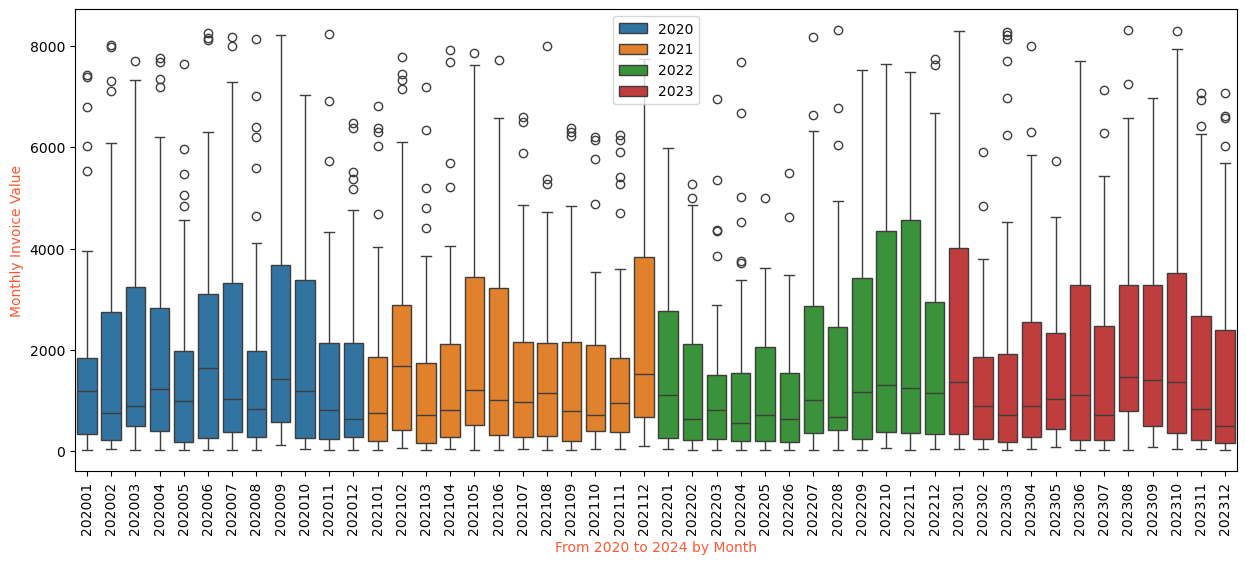

In [206]:
plt.figure(figsize=(15, 6))
_ = sns.boxplot(x='InDtYYYYMM', y='InvAmount', data=AU_sales_clean, hue='Year')
plt.xticks(rotation=90)
plt.legend(loc='upper center')
plt.xlabel("From 2020 to 2024 by Month", color='#FF5733')
plt.ylabel("Monthly Invoice Value", color='#FF5733')
plt.show()

In [207]:
# 2. Filter data for invoices from the year 2023
#AU_sales_2023 = AU_sales[AU_sales['InDtYYYYMM'].astype(str).str[:4] == '2023']

# 3. Group by 'customer_id' and sum 'invoice_amount'
customer_invoice_totals = online_sales_df.groupby('CustomerID')['InvAmount'].sum()

# 4. Sort customers by total invoice amount in descending order and select the top 10
top_10_customers = customer_invoice_totals.sort_values(ascending=False).head(10)

# If you want the original data (with all columns) for the top 10 customers:
top_10_customer_data = online_sales_df[online_sales_df['CustomerID'].isin(top_10_customers.index)]

top_10_customer_data['CustomerID'] = top_10_customer_data['CustomerID'].astype(str)

C:\Users\niazs\AppData\Local\Temp\ipykernel_24496\627239889.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_customer_data['CustomerID'] = top_10_customer_data['CustomerID'].astype(str)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


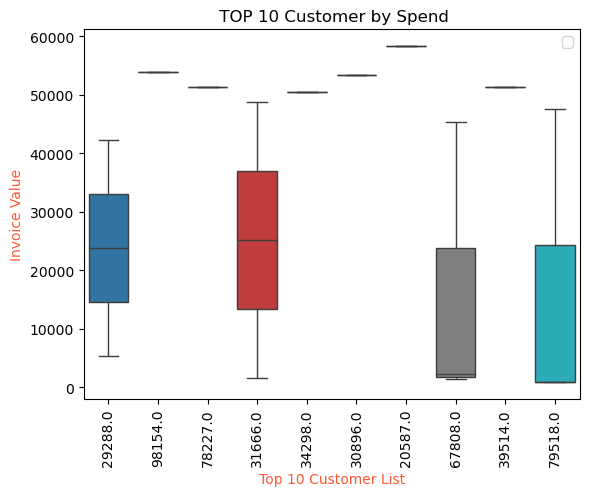

In [208]:
#plt.figure(figsize=(15, 6))
sns.boxplot(x='CustomerID', y='InvAmount', data=top_10_customer_data, hue='CustomerID')
plt.title(" TOP 10 Customer by Spend")
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.xlabel("Top 10 Customer List", color='#FF5733')
plt.ylabel("Invoice Value", color='#FF5733')
plt.show()


# End of Project